Single-Cell RNA-Sequencing From Mouse Incisor Reveals Dental Epithelial Cell-Type Specific Genes:

 https://www.frontiersin.org/articles/10.3389/fcell.2020.00841/full. 
 
 Link to the dataset is:
 
  https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM4407907

In [1]:
# Loading the packages

!pip install scanpy
!pip install harmonypy
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 2.7 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=f590626796168859d83a84b159bef45079430caa16d104a2c0d168752ac9f13c
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=22a5d6e0e8c3330c39

In [98]:
# Dowload the data

!wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4407nnn/GSM4407907/suppl/GSM4407907_barcodes.tsv.gz
!wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4407nnn/GSM4407907/suppl/GSM4407907_genes.tsv.gz
!wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4407nnn/GSM4407907/suppl/GSM4407907_matrix.mtx.gz

--2023-05-25 00:33:25--  https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4407nnn/GSM4407907/suppl/GSM4407907_barcodes.tsv.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 165.112.9.228, 165.112.9.229, 2607:f220:41f:250::230, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|165.112.9.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25570 (25K) [application/x-gzip]
Saving to: ‘GSM4407907_barcodes.tsv.gz’

GSM4407907_barcodes 100%[===================>]  24.97K  --.-KB/s    in 0.01s   

2023-05-25 00:33:25 (2.01 MB/s) - ‘GSM4407907_barcodes.tsv.gz’ saved [25570/25570]

--2023-05-25 00:33:25--  https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4407nnn/GSM4407907/suppl/GSM4407907_genes.tsv.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 165.112.9.228, 165.112.9.229, 2607:f220:41f:250::230, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|165.112.9.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 

In [11]:
# Import pakages

import os
import scanpy as sc
import scanpy.external as sce


In [99]:
# Small organization process

from pathlib import Path

os.mkdir("GSM4407907")
Path("GSM4407907_barcodes.tsv.gz").rename("GSM4407907/GSM4407907_barcodes.tsv.gz")
Path("GSM4407907_genes.tsv.gz").rename("GSM4407907/GSM4407907_genes.tsv.gz")
Path("GSM4407907_matrix.mtx.gz").rename("GSM4407907/GSM4407907_matrix.mtx.gz")

PosixPath('GSM4407907/GSM4407907_matrix.mtx.gz')

In [ ]:
!gzip -d "GSM4407907/GSM4407907_barcodes.tsv.gz"
!gzip -d "GSM4407907/GSM4407907_genes.tsv.gz"
!gzip -d "GSM4407907/GSM4407907_matrix.mtx.gz"

In [142]:
# Load UMI raw matrices to anndata objects

adata = sc.read_10x_mtx(path='GSM4407907', prefix='GSM4407907_')

In [143]:
# Let's calculate quality metrics

adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata

AnnData object with n_obs × n_vars = 6260 × 48816
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

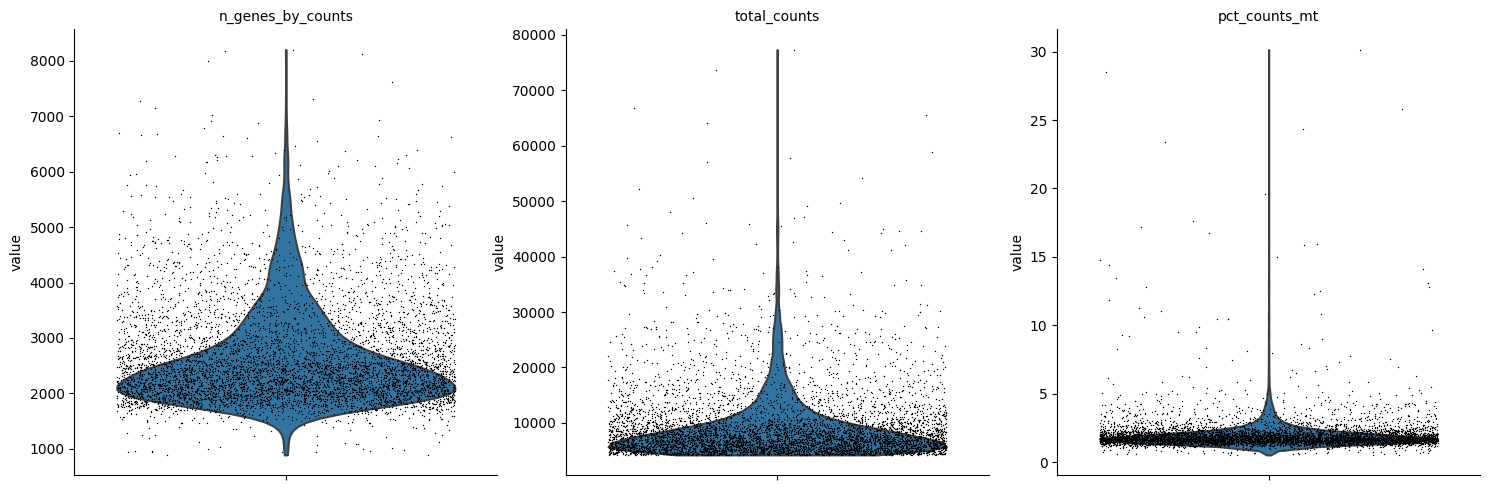

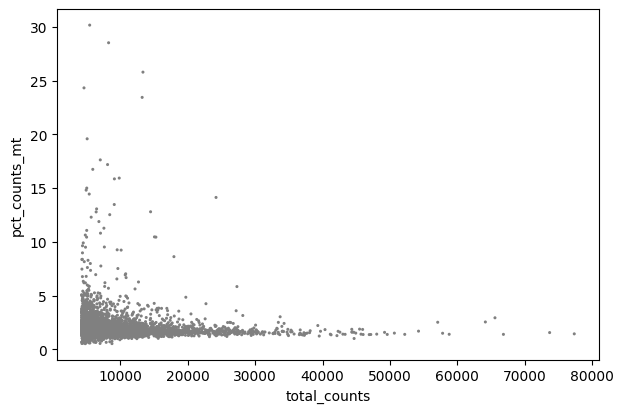

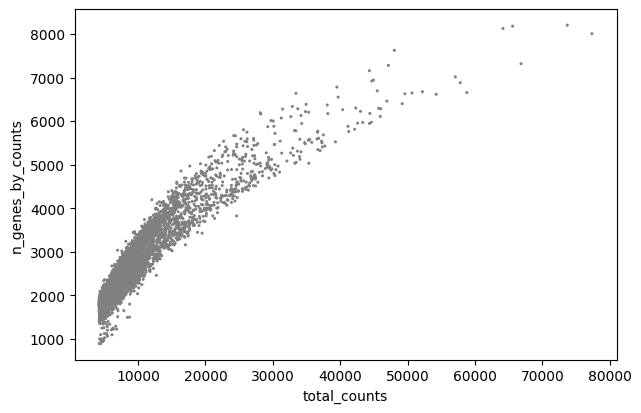

In [144]:
# And look at them

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

**What thresholds you would choose to remove doublet cells?**

In [145]:
# Choice is based the article

sc.pp.filter_cells(adata, min_genes=700)
sc.pp.filter_genes(adata, min_cells=5)
sc.pp.filter_cells(adata, max_counts=25000) #  choosen by graphics 

adata = adata[adata.obs.pct_counts_mt < 6, :]

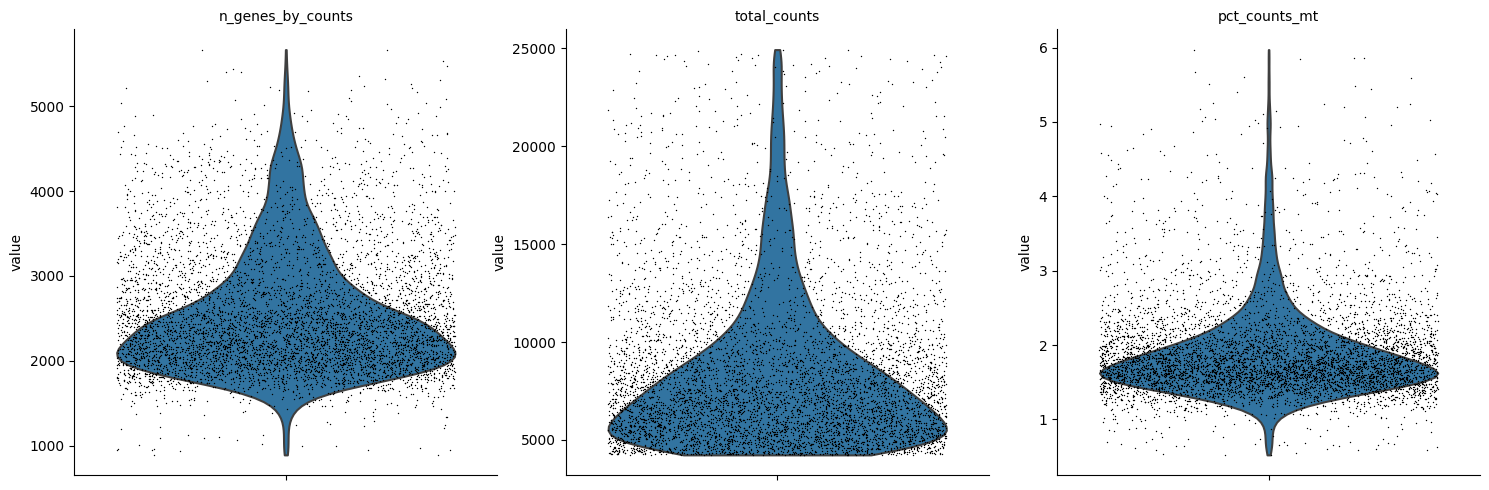

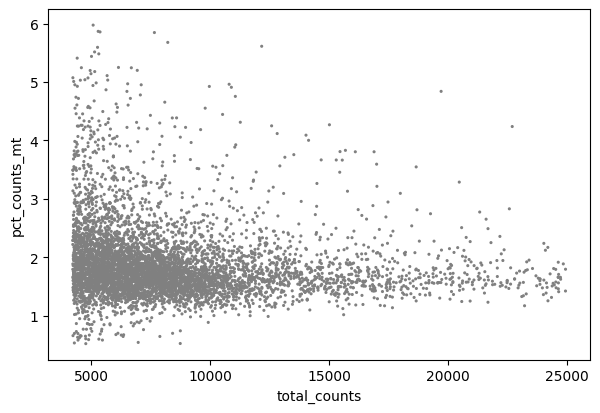

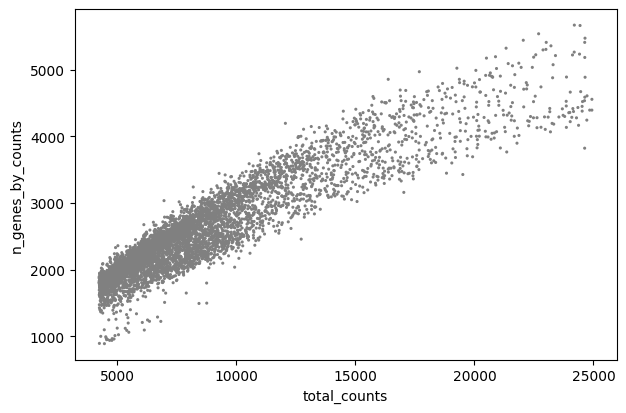

In [146]:
# Look after filtering

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [147]:
# Normalizing the data

sc.pp.normalize_total(adata, target_sum=1e4)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [148]:
sc.pp.log1p(adata)

In [149]:
# Choosing HVGs

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

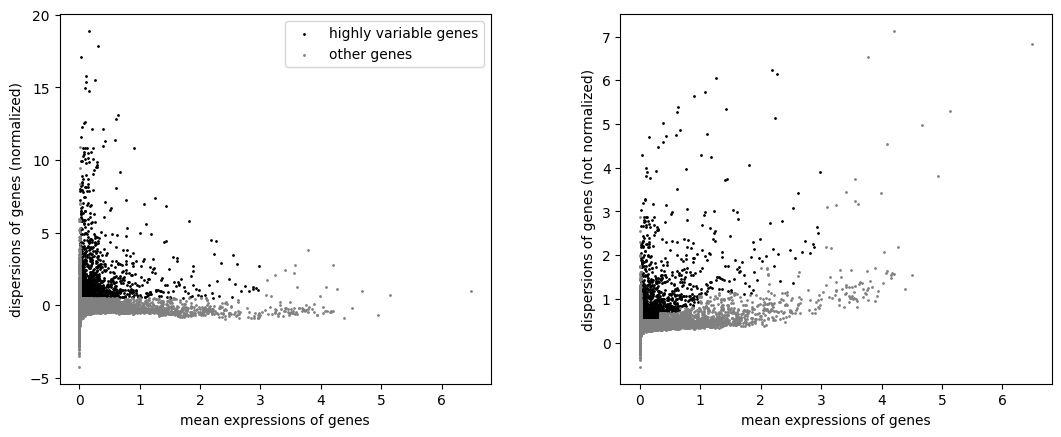

In [150]:
# You can use this plot to see how the HVGs were chosen

sc.pl.highly_variable_genes(adata)

In [151]:
# I also prefer to know the exact number of HVGs that I have in the data

adata.var.highly_variable.value_counts()

False    18135
True      1584
Name: highly_variable, dtype: int64

In [152]:
# Saving normalized data before subset

adata.raw = adata

In [153]:
# Subset only HVGs for dim reduction

adata = adata[:, adata.var.highly_variable]

In [154]:
# Scaling the data (Z-score normalization)

sc.pp.scale(adata, max_value=10)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [155]:
# PCA 

sc.tl.pca(adata)

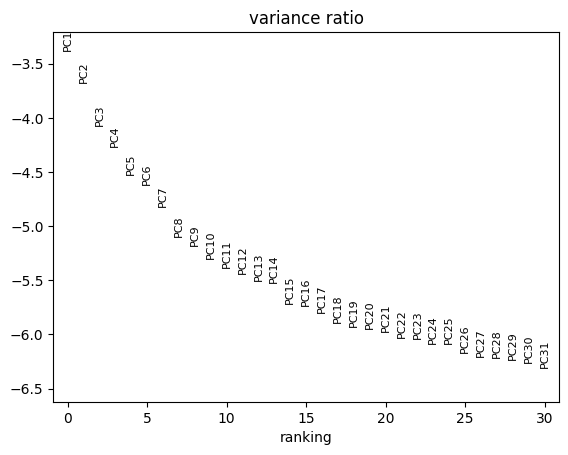

In [156]:
# Elbow plot to choose number of PCs for UMAP

sc.pl.pca_variance_ratio(adata, log=True)

In [157]:
# Building the UMAP (2 steps)

sc.pp.neighbors(adata, n_pcs=15, metric='cosine') #  npcs taken from the article

In [158]:
sc.tl.umap(adata)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


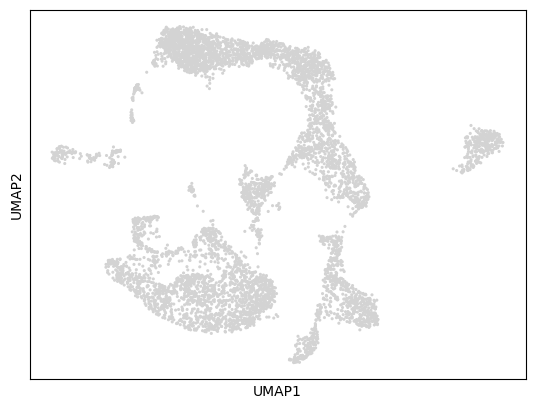

In [159]:
sc.pl.umap(adata)

In [160]:
# Let's cluster the data!

sc.tl.leiden(adata,  resolution=0.2) #  res is taken from the article

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


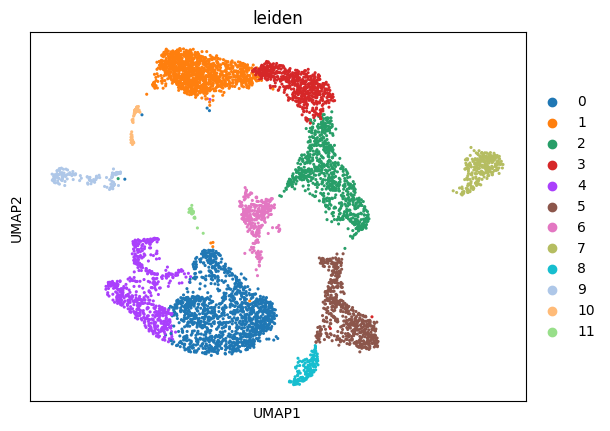

In [161]:
# And look at the clusters

sc.pl.umap(adata, color=['leiden'])

**Innate Lymphoid cells are CD45+CD3-CD94-CD127+** \\
Let's check the data for these markers.

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


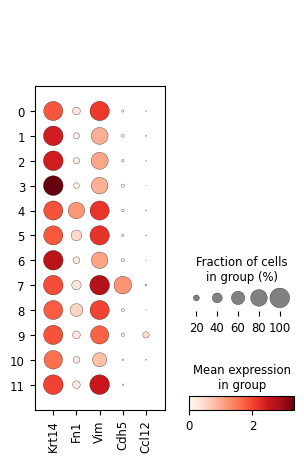

In [172]:
marker_genes = ['Krt14', 'Fn1', 'Vim', 'Cdh5', 'Ccl12'] # from the article
sc.pl.dotplot(adata, marker_genes, groupby='leiden')

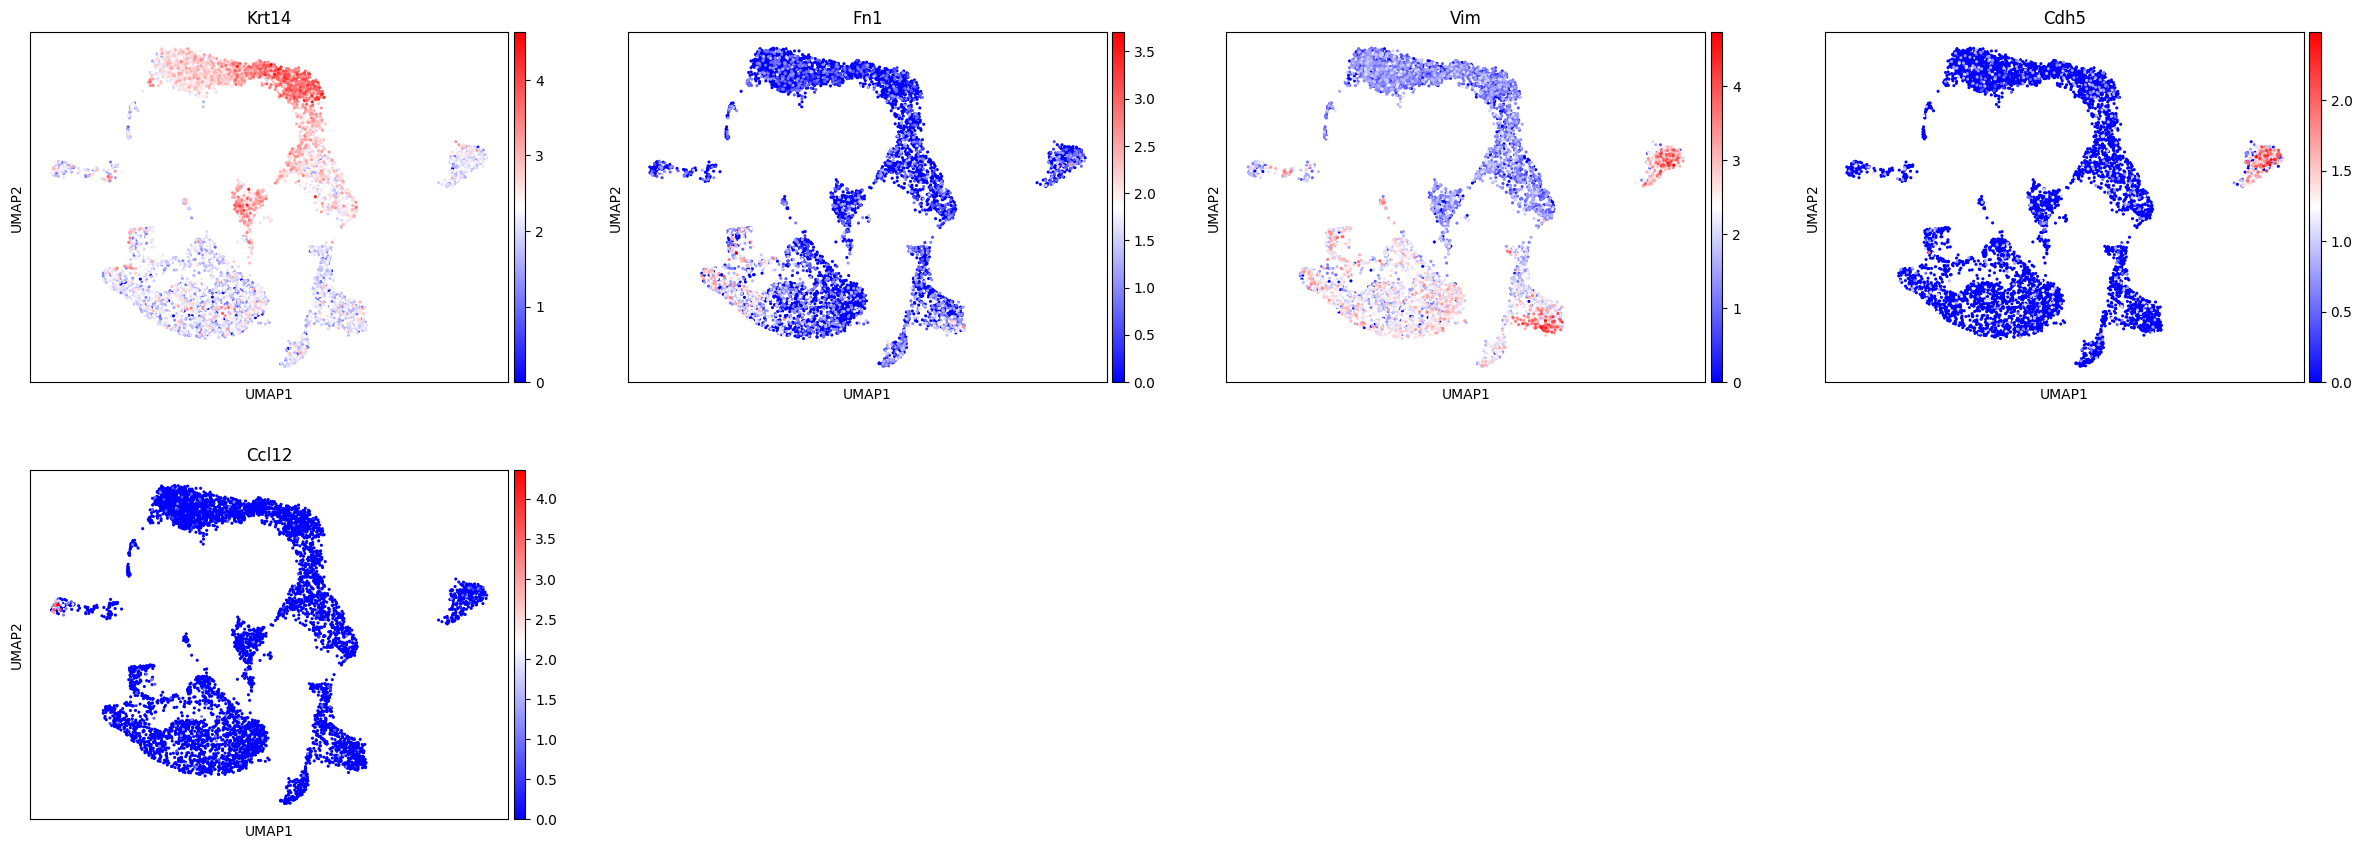

In [173]:
sc.pl.umap(adata, color=marker_genes, color_map='bwr')

Actually results look similar to the ones from the artcle. 

There were also detected huge Epithelium and Mesenchyme clusters, small Erythrocyte clyster and extra small Leukocyte cluster. Even distribution and relative positioning among principle components look the same:

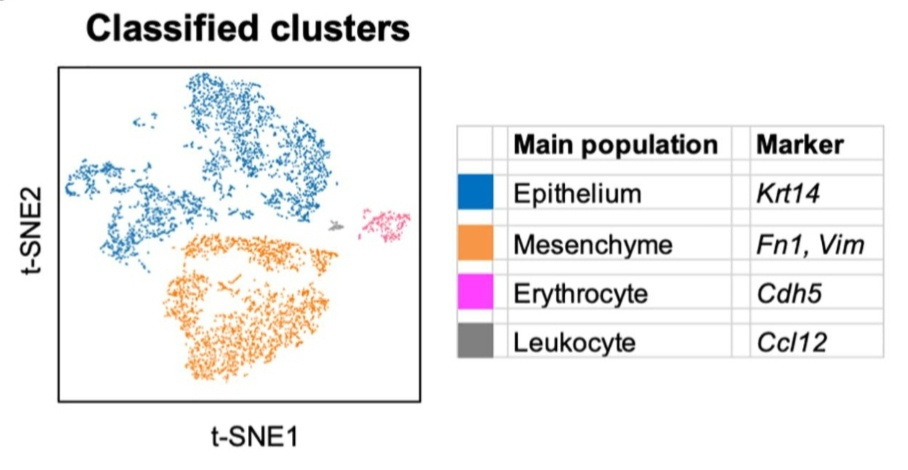